In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import pandas as pd

# Load the dataset
booking = pd.read_csv("dataset/hotel_booking.csv")

# Columns to drop
cols_to_drop = ['Booking_ID', 'name', 'email', 'phone-number', 'credit_card']

# Drop the columns safely
booking.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

# Make index start from 1
booking.index = booking.index + 1

# Check the result
print("Shape of dataset:", booking.shape)
booking.head()


Shape of dataset: (119390, 32)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
1  Resort Hotel            0        342               2015               July   
2  Resort Hotel            0        737               2015               July   
3  Resort Hotel            0          7               2015               July   
4  Resort Hotel            0         13               2015               July   
5  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
1                        0                     0       2  ...    No Deposit   
2                        0                     0       2  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     1       1  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient   0.0   
3    NaN     NaN                    0     Transient  75.0   
4  304.0     NaN                    0     Transient  75.0   
5  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          0           Check-Out   
5                            0                          1           Check-Out   

  reservation_status_date  
1              01-07-2015  
2              01-07-2015  
3              02-07-2015  
4              02-07-2015  
5              03-07-2015  

[5 rows x 32 columns]

In [3]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("dataset/hotel_booking.csv")  # replace with your file path

# Check the unique values in 'adr' column
print(df['adr'].unique())


[  0.    75.    98.   ... 266.75 209.25 157.71]


In [4]:
profile = ProfileReport(booking, title="Pandas Profiling Report")

In [5]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 1 to 119390
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
booking.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
booking.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [8]:
print(booking.isnull().sum().sort_values(ascending=False))

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

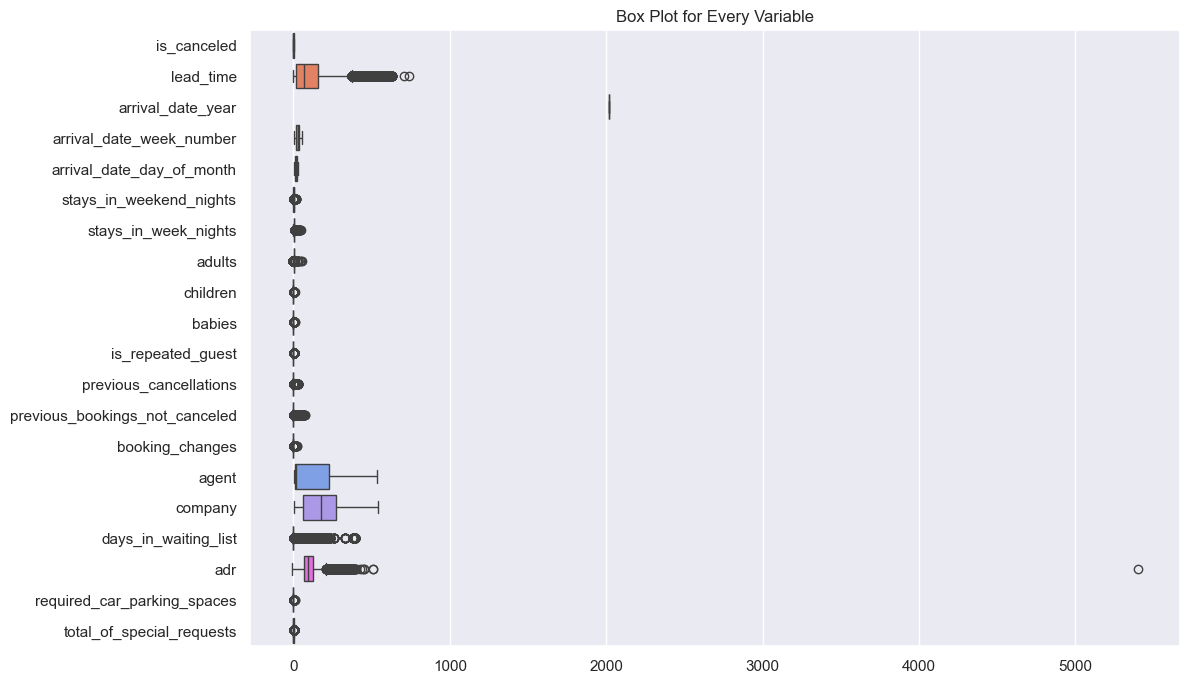

(119390, 32)


In [9]:
# Create box plots for every variable before droping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=booking, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(booking.shape)

In [11]:
# Columns to check for outliers
outliers_cols = ["lead_time", "adr"]  # use correct column names

for column in outliers_cols:
    if booking[column].dtype in ["int64", "float64"]:
        q1 = booking[column].quantile(0.25)
        q3 = booking[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Keep only values within the IQR bounds
        booking = booking[(booking[column] >= lower_bound) & (booking[column] <= upper_bound)]

print("Shape after removing outliers:", booking.shape)
booking.head()


Shape after removing outliers: (112617, 32)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
1  Resort Hotel            0        342               2015               July   
3  Resort Hotel            0          7               2015               July   
4  Resort Hotel            0         13               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
1                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
1                        0                     0       2  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     1       1  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   
6                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
1    NaN     NaN                    0     Transient   0.0   
3    NaN     NaN                    0     Transient  75.0   
4  304.0     NaN                    0     Transient  75.0   
5  240.0     NaN                    0     Transient  98.0   
6  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
1                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          0           Check-Out   
5                            0                          1           Check-Out   
6                            0                          1           Check-Out   

  reservation_status_date  
1              01-07-2015  
3              02-07-2015  
4              02-07-2015  
5              03-07-2015  
6              03-07-2015  

[5 rows x 32 columns]

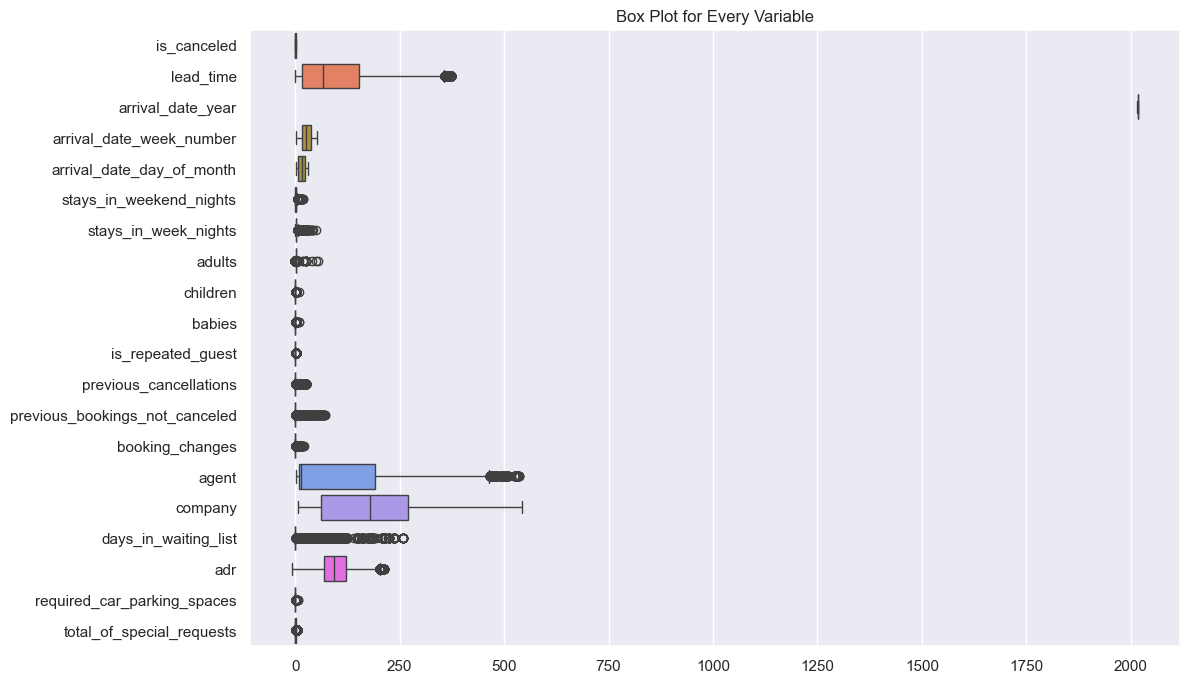

(112617, 32)


In [12]:
# Create box plots for every variable after dropping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
booking_boxplot = sns.boxplot(data=booking, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(booking.shape)

In [14]:
Canceled = 1 
Not_Canceled = 0

In [16]:
# Replace string labels with numeric values
booking["is_canceled"] = booking["is_canceled"].replace({"Canceled": 1, "Not_Canceled": 0})

# Check the result
booking.head()


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
1  Resort Hotel            0        342               2015               July   
3  Resort Hotel            0          7               2015               July   
4  Resort Hotel            0         13               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
1                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
1                        0                     0       2  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     1       1  ...    No Deposit   
5                        0                     2       2  ...    No Deposit   
6                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
1    NaN     NaN                    0     Transient   0.0   
3    NaN     NaN                    0     Transient  75.0   
4  304.0     NaN                    0     Transient  75.0   
5  240.0     NaN                    0     Transient  98.0   
6  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
1                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          0           Check-Out   
5                            0                          1           Check-Out   
6                            0                          1           Check-Out   

  reservation_status_date  
1              01-07-2015  
3              02-07-2015  
4              02-07-2015  
5              03-07-2015  
6              03-07-2015  

[5 rows x 32 columns]

In [18]:
# Remove any invalid dates if necessary (optional)
booking = booking[~booking["reservation_status_date"].str.contains("-")]

# Convert to datetime
booking["reservation_status_date"] = pd.to_datetime(booking["reservation_status_date"])

# Extract day, month, year
booking["day"] = booking["reservation_status_date"].dt.day
booking["month"] = booking["reservation_status_date"].dt.month
booking["year"] = booking["reservation_status_date"].dt.year

# Drop the original datetime column
booking = booking.drop(columns=["reservation_status_date"])

# Check dataset info
booking.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           0 non-null      object 
 1   is_canceled                     0 non-null      int64  
 2   lead_time                       0 non-null      int64  
 3   arrival_date_year               0 non-null      int64  
 4   arrival_date_month              0 non-null      object 
 5   arrival_date_week_number        0 non-null      int64  
 6   arrival_date_day_of_month       0 non-null      int64  
 7   stays_in_weekend_nights         0 non-null      int64  
 8   stays_in_week_nights            0 non-null      int64  
 9   adults                          0 non-null      int64  
 10  children                        0 non-null      float64
 11  babies                          0 non-null      int64  
 12  meal                            0 non-null      objec

In [20]:
# Round the average daily rate and convert to integer
booking["adr"] = booking["adr"].round().astype(int)

# Check the result
booking.head()


Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, day, month, year]
Index: []

[0 rows x 34 columns]

In [23]:
# List of boolean columns
bool_cols = ["is_repeated_guest"]  # add more if needed

# Convert True/False to 1/0
for col in bool_cols:
    booking[col] = booking[col].astype(int)

booking.head()


Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, day, month, year]
Index: []

[0 rows x 34 columns]

In [24]:
object_columns = booking.select_dtypes(include=["object"]).columns
booking = pd.get_dummies(booking, columns=object_columns)
booking = booking.replace({True: 1, False: 0})
booking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     0 non-null      int64  
 1   lead_time                       0 non-null      int64  
 2   arrival_date_year               0 non-null      int64  
 3   arrival_date_week_number        0 non-null      int64  
 4   arrival_date_day_of_month       0 non-null      int64  
 5   stays_in_weekend_nights         0 non-null      int64  
 6   stays_in_week_nights            0 non-null      int64  
 7   adults                          0 non-null      int64  
 8   children                        0 non-null      float64
 9   babies                          0 non-null      int64  
 10  is_repeated_guest               0 non-null      int32  
 11  previous_cancellations          0 non-null      int64  
 12  previous_bookings_not_canceled  0 non-null      int64

In [25]:
booking.head()

Empty DataFrame
Columns: [is_canceled, lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests, day, month, year]
Index: []

[0 rows x 23 columns]

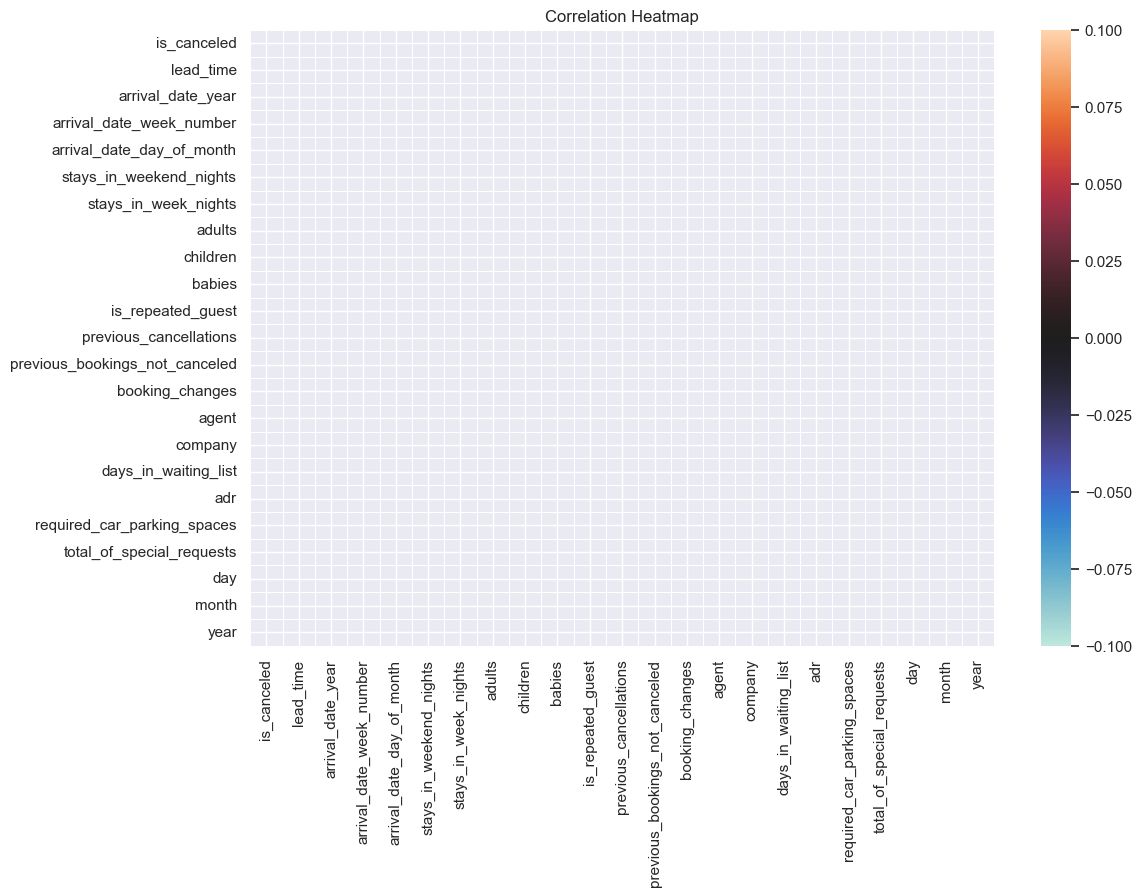

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(booking.corr(), cmap="icefire", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [30]:

print(booking.shape)
booking.head()


(0, 23)


Empty DataFrame
Columns: [is_canceled, lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests, day, month, year]
Index: []

[0 rows x 23 columns]

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

numeric_features = booking.select_dtypes(include=['int64', 'float64']).drop("is_canceled", axis=1)
target = booking["is_canceled"]

k_best = SelectKBest(score_func=f_classif, k=10)
X = k_best.fit_transform(numeric_features, target)


(217, 36)


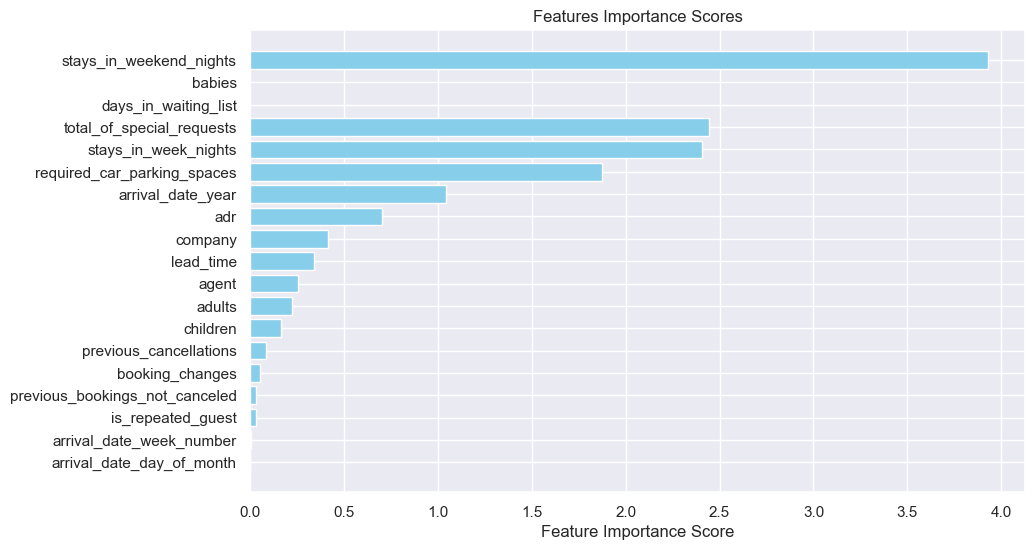

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Ensure your dataset has rows
print(booking.shape)

# Features and target
features = booking.drop(["is_canceled"], axis=1)
target = booking["is_canceled"]

# Keep only numeric features
numeric_features = features.select_dtypes(include=['int64', 'float64'])

# Only proceed if data exists
if numeric_features.shape[0] > 0:
    # Select top 10 features
    k_best = SelectKBest(score_func=f_classif, k=10)
    X = k_best.fit_transform(numeric_features, target)
    
    # Get feature scores and names
    feature_scores = k_best.scores_
    feature_names = numeric_features.columns
    sorted_feature_info = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)
    
    # Plot
    feature_names, feature_scores = zip(*sorted_feature_info[:])
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_scores, color="skyblue")
    plt.xlabel("Feature Importance Score")
    plt.title("Features Importance Scores")
    plt.gca().invert_yaxis()  # highest score on top
    plt.show()
else:
    print("No numeric features or dataset is empty. Cannot plot feature importance.")


In [44]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Ensure dataset is not empty
print(booking.shape)

features = booking.drop(["is_canceled"], axis=1)
target = booking["is_canceled"]

# Keep only numeric features
numeric_features = features.select_dtypes(include=['int64', 'float64'])

if numeric_features.shape[0] > 0:
    # Select top 10 features
    k_best = SelectKBest(score_func=f_classif, k=10)
    X_selected = k_best.fit_transform(numeric_features, target)
    
    # Get selected feature indices
    selected_features_indices = k_best.get_support(indices=True)
    
    # Create a DataFrame with only selected features
    selected_features_df = numeric_features.iloc[:, selected_features_indices]
    print(selected_features_df.head())
else:
    print("Dataset is empty or has no numeric features. Cannot select features.")


(217, 36)
      lead_time  arrival_date_year  stays_in_weekend_nights  \
2392          6               2015                        2   
2697         24               2015                        7   
2867         24               2015                        0   
2877         24               2015                        2   
2878         24               2015                        3   

      stays_in_week_nights  adults  agent  company   adr  \
2392                     0       2  240.0    113.0  82.0   
2697                    15       1  185.0    281.0  52.2   
2867                     3       2  334.0    281.0  48.0   
2877                    10       1  328.0    281.0  40.0   
2878                    10       2  326.0    281.0  48.0   

      required_car_parking_spaces  total_of_special_requests  
2392                            1                          1  
2697                            0                          0  
2867                            0                          0 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.2, random_state=5
)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scores = {}

Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.9191596638655462
Accuracy: 0.93
---------------------------------------------------------
Confusion Matrix: 
[[41  0]
 [ 3  0]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       0.00      0.00      0.00         3

    accuracy                           0.93        44
   macro avg       0.47      0.50      0.48        44
weighted avg       0.87      0.93      0.90        44



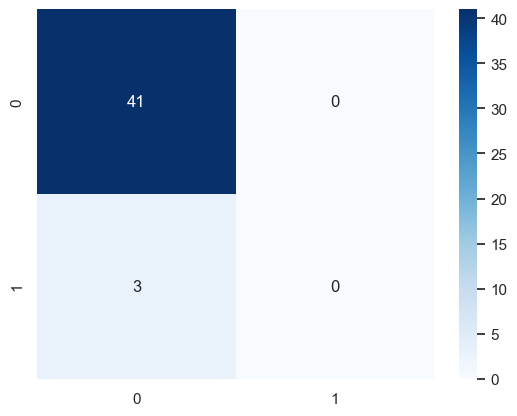

In [47]:
log_reg = LogisticRegression()

params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}

grid_search = GridSearchCV(log_reg, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Logistic Regression"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Best Parameters: {'n_neighbors': 4}
Best Score: 0.9191596638655462
Accuracy: 0.95
---------------------------------------------------------
Confusion Matrix: 
[[41  0]
 [ 2  1]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.33      0.50         3

    accuracy                           0.95        44
   macro avg       0.98      0.67      0.74        44
weighted avg       0.96      0.95      0.94        44



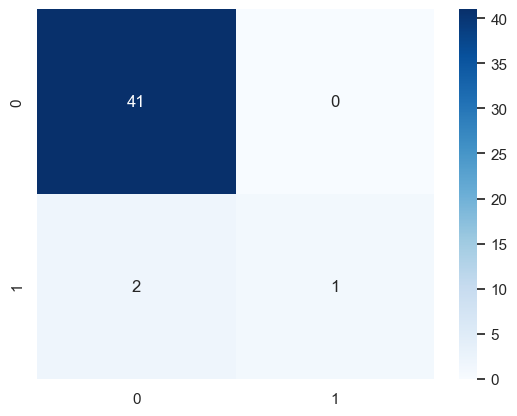

In [48]:
knn = KNeighborsClassifier()

params = {"n_neighbors": np.arange(1, 10)}

grid_search = GridSearchCV(knn, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["KNN"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5}
Best Score: 0.9307563025210085
Accuracy: 0.93
---------------------------------------------------------
Confusion Matrix: 
[[41  0]
 [ 3  0]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       0.00      0.00      0.00         3

    accuracy                           0.93        44
   macro avg       0.47      0.50      0.48        44
weighted avg       0.87      0.93      0.90        44



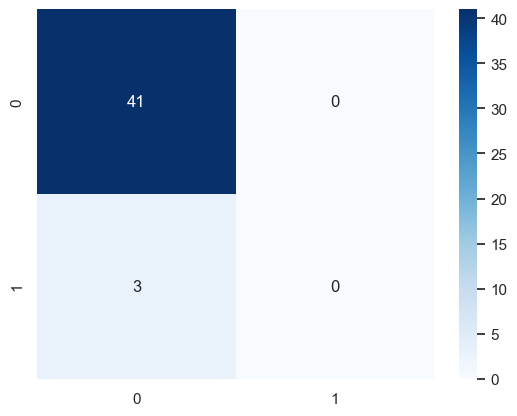

In [49]:
dt = DecisionTreeClassifier()

params = {"max_depth": np.arange(0, 30, 5), "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(dt, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Decision Tree"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 0.93
---------------------------------------------------------
Confusion Matrix: 
[[41  0]
 [ 3  0]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       0.00      0.00      0.00         3

    accuracy                           0.93        44
   macro avg       0.47      0.50      0.48        44
weighted avg       0.87      0.93      0.90        44



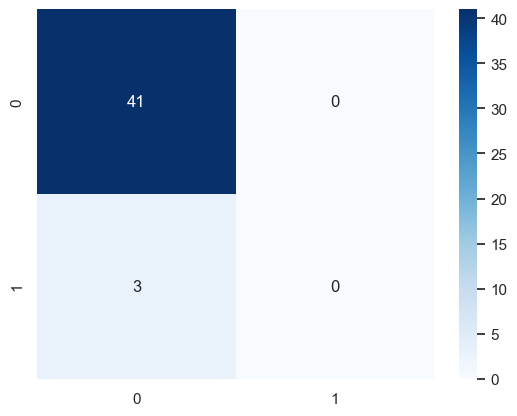

In [50]:
rf = RandomForestClassifier(max_depth=20, n_estimators=20)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Random Forest"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 0.91
---------------------------------------------------------
Confusion Matrix: 
[[40  1]
 [ 3  0]]
---------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.00      0.00      0.00         3

    accuracy                           0.91        44
   macro avg       0.47      0.49      0.48        44
weighted avg       0.87      0.91      0.89        44



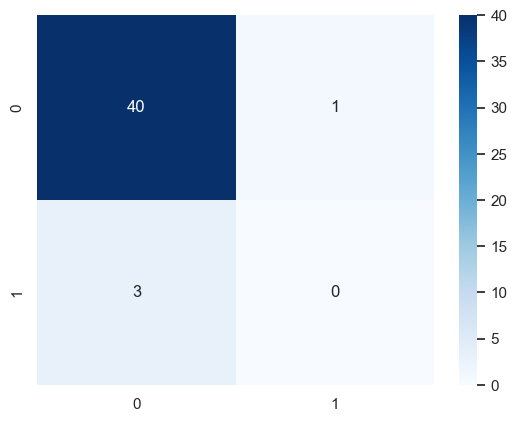

In [51]:
svc = SVC(C=100, kernel="rbf", gamma=0.1)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["SVC"] = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
print("---------------------------------------------------------")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

In [52]:
for model, score in scores.items():
    print(f"{model}: {score:.4f}")

Logistic Regression: 0.9318
KNN: 0.9545
Decision Tree: 0.9318
Random Forest: 0.9318
SVC: 0.9091


[  0.    75.    98.   ... 266.75 209.25 157.71]
